Capítulo 4:
Ejercicios derivación: 1,2,5,6

1. Sea la primera derivada discreta
$$
f'(x)=\frac{f(x+h)-f(x-h)}{2h}
$$
Entonces,
$$
f''(x)=\frac{f'(x+h)-f'(x-h)}{2h}
$$
Reemplace $f'(x+h)=\frac{f(x+2h)-f(x)}{2h}$ y $f'(x-h)=\frac{f(x)-f(x-2h)}{2h}$. De modo que,
$$
\begin{align}
f''(x) &= \frac{(\frac{f(x+2h)-f(x)}{2h})-(\frac{f(x)-f(x-2h)}{2h})}{2h}\\
&= \frac{(\frac{f(x+2h)-f(x)-f(x)+f(x-2h)}{2h})}{2h}\\
&= \frac{f(x+2h)-2f(x)+f(x-2h)}{4h^2}
\end{align}
$$
Lo que es equivalente a 
$$
f''(x)=\frac{f(x_{i+2})-2f(x_i)+f(x_{i-2})}{4h^2}
$$

Donde los $x$ de la forma $x_j$ representan los puntos de la discretizacion equi-espaciados $x_j=x_0+jh$.

In [663]:
#EJERCICIO 2
#Parte a: calcular la derivada
import numpy as np
import matplotlib.pyplot as plt

In [664]:
def f(x):
    return 1/(np.sqrt(1+(np.e**(-(x**2)))))

In [665]:
#Calcular derivada exacta
import sympy as sym

x = sym.Symbol('x', real = True)
F = 1/(sym.sqrt(1+(np.e**(-(x**2)))))

def exact_derivative(f):
    return sym.diff(f)

In [666]:
h = 0.05
X = np.arange(-10, 10, h)

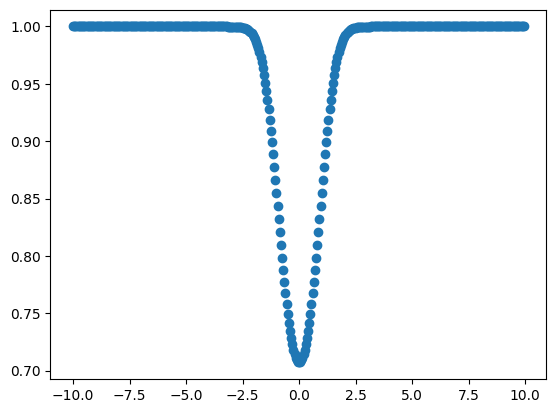

In [667]:
plt.scatter(X, f(X))

In [668]:
def central_derivative(f, x, h):
    d = 0.
    if h != 0:
        d = (f(x+h)-f(x-h))/(2*h)
    return d

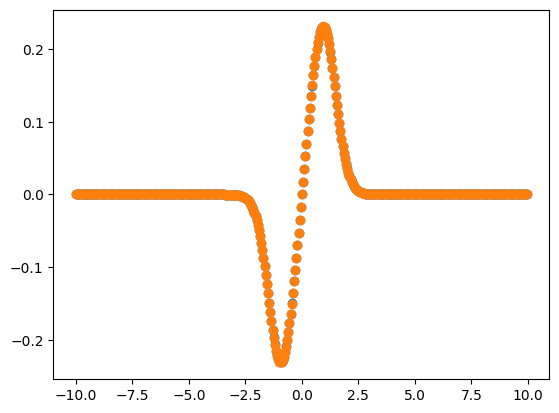

In [669]:
dX = np.array([exact_derivative(F).subs(x, X[i]) for i in range(len(X))])

plt.scatter(X, central_derivative(f, X, h))
plt.scatter(X, dX)

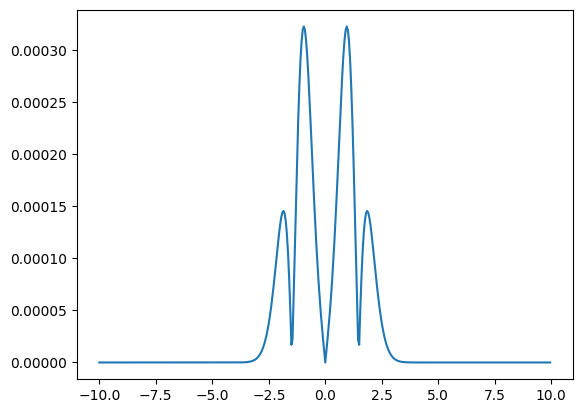

In [670]:
#Parte b: Error local
plt.plot(X, np.abs(central_derivative(f, X, h)-dX))


5. La expansion de la serie de Maclaurin para una funcion en $x'+h$ es:
$$
f(x'+h)=\sum^\infty_{n=0}\frac{f^{(n)}(x')}{n!}h^n\
$$
Tome,
$$
\begin{align}
f(x+h) &= f(x)+hf'(x)+\frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(x)+\mathcal{O}(h^5) \\
f(x-h) &= f(x)-hf'(x)+\frac{h^2}{2!}f''(x)-\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(x)+\mathcal{O}(h^5) \\
\end{align}
$$
La suma de ambas expresiones es:
$$
f(x+h)+f(x-h)= 2f(x)+h^2f''(x)+\frac{h^4}{4}f^{(4)}(x)+\mathcal{O}(h^5)
$$
$f''(x)$ se puede reemplazar por la expresion anteriormente deducida:
$$
f''(x)=\frac{f(x+2h)-2f(x)+f(x-2h)}{4h^2}
$$
Como el orden de error de $f''(x)$ es $\mathcal{O}(h^2)$. Entonces para un $h$ bastante pequeña se vuelve mayor que $\mathcal{O}(h^5)$. Asi que,
$$
\begin{align}
f(x+h)+f(x-h) &= 2f(x)+\frac{f(x+2h)-2f(x)+f(x-2h)}{4}+\frac{h^4}{4}f^{(4)}(x)+\mathcal{O}(h^2) \\
4f(x+h)+4f(x-h) &= 8f(x)+f(x+2h)-2f(x)+f(x-2h)+{h^4}f^{(4)}(x)+\mathcal{O}(h^2) \\
4f(x+h)+4f(x-h) &= 6f(x)+f(x+2h)+f(x-2h)+{h^4}f^{(4)}(x)+\mathcal{O}(h^2) \\
\end{align}
$$
Se despeja el termino de $f^{(4)}(x)$:
$$
f^{(4)}(x) = \frac{-4f(x+h)-4f(x-h)+6f(x)+f(x+2h)+f(x-2h)}{h^4}+\mathcal{O}(h^2) 
$$
Se reorganiza y se escribe usando los puntos de la discretizacion:
$$
f^{(4)}(x) = \frac{f(x_{i-2})-4f(x_{i-1})+6f(x_i)-4f(x_{i+1})+f(x_{i+2})}{h^4}+\mathcal{O}(h^2) 
$$

In [671]:
#EJERCICIO 6
R = 2
x = np.arange(-4, 4, 0.32)
y = np.arange(-4, 4, 0.32)
(x, y) = np.meshgrid(x, y)

r = x**2 + y**2
r[r<R] = np.nan


In [672]:
V = 2
h = 0.001

def potencial_flujo(x,y):
    return V*x*(1-((R**2)/r))


In [673]:
def partial_cderivative_x(f, x, y, h):
    d = 0.
    if h != 0:
        d = (f(x+h,y)-f(x-h,y))/(2*h)
    return d

def partial_cderivative_y(f, x, y, h):
    d = 0.
    if h != 0:
        d = (f(x,y+h)-f(x,y-h))/(2*h)
    return d

In [674]:
vx = partial_cderivative_x(potencial_flujo, x, y, h)
vy = -partial_cderivative_y(potencial_flujo, x, y, h)

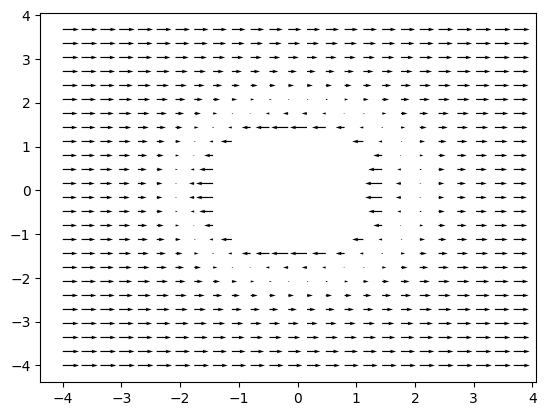

In [675]:
plt.quiver(x, y, vx, vy)